<div style="width: 100%; overflow: hidden;">
    <div style="width: 150px; float: left;"> <img src="data/D4Sci_logo_ball.png" alt="Data For Science, Inc" align="left" border="0"> </div>
    <div style="float: left; margin-left: 10px;"> 
        <h1>RNNs for Timeseries Analysis</h1>
        <h1>Sine-wave example</h1>
        <p>Bruno Gonçalves<br/>
        <a href="http://www.data4sci.com/">www.data4sci.com</a><br/>
        @bgoncalves, @data4sci</p></div>
</div>

In [5]:
from collections import Counter
from pprint import pprint

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

import watermark

np.random.seed(123)

import math

import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, SimpleRNN
from sklearn.metrics import mean_squared_error

%load_ext watermark
%matplotlib inline


%load_ext watermark
%matplotlib inline

Using TensorFlow backend.


The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


We start by print out the versions of the libraries we're using for future reference

In [ ]:
%watermark -n -v -m -g -iv

Load default figure style

In [9]:
plt.style.use('./d4sci.mplstyle')

## Create dataset

In [6]:
X = np.arange(0, 360)
y = np.sin(X*np.pi/10)
dataset = pd.DataFrame({"X": X, "y":y})
dataset = dataset.set_index("X")

It's always important to see what you are doing. You can save a lot of time like this ;)

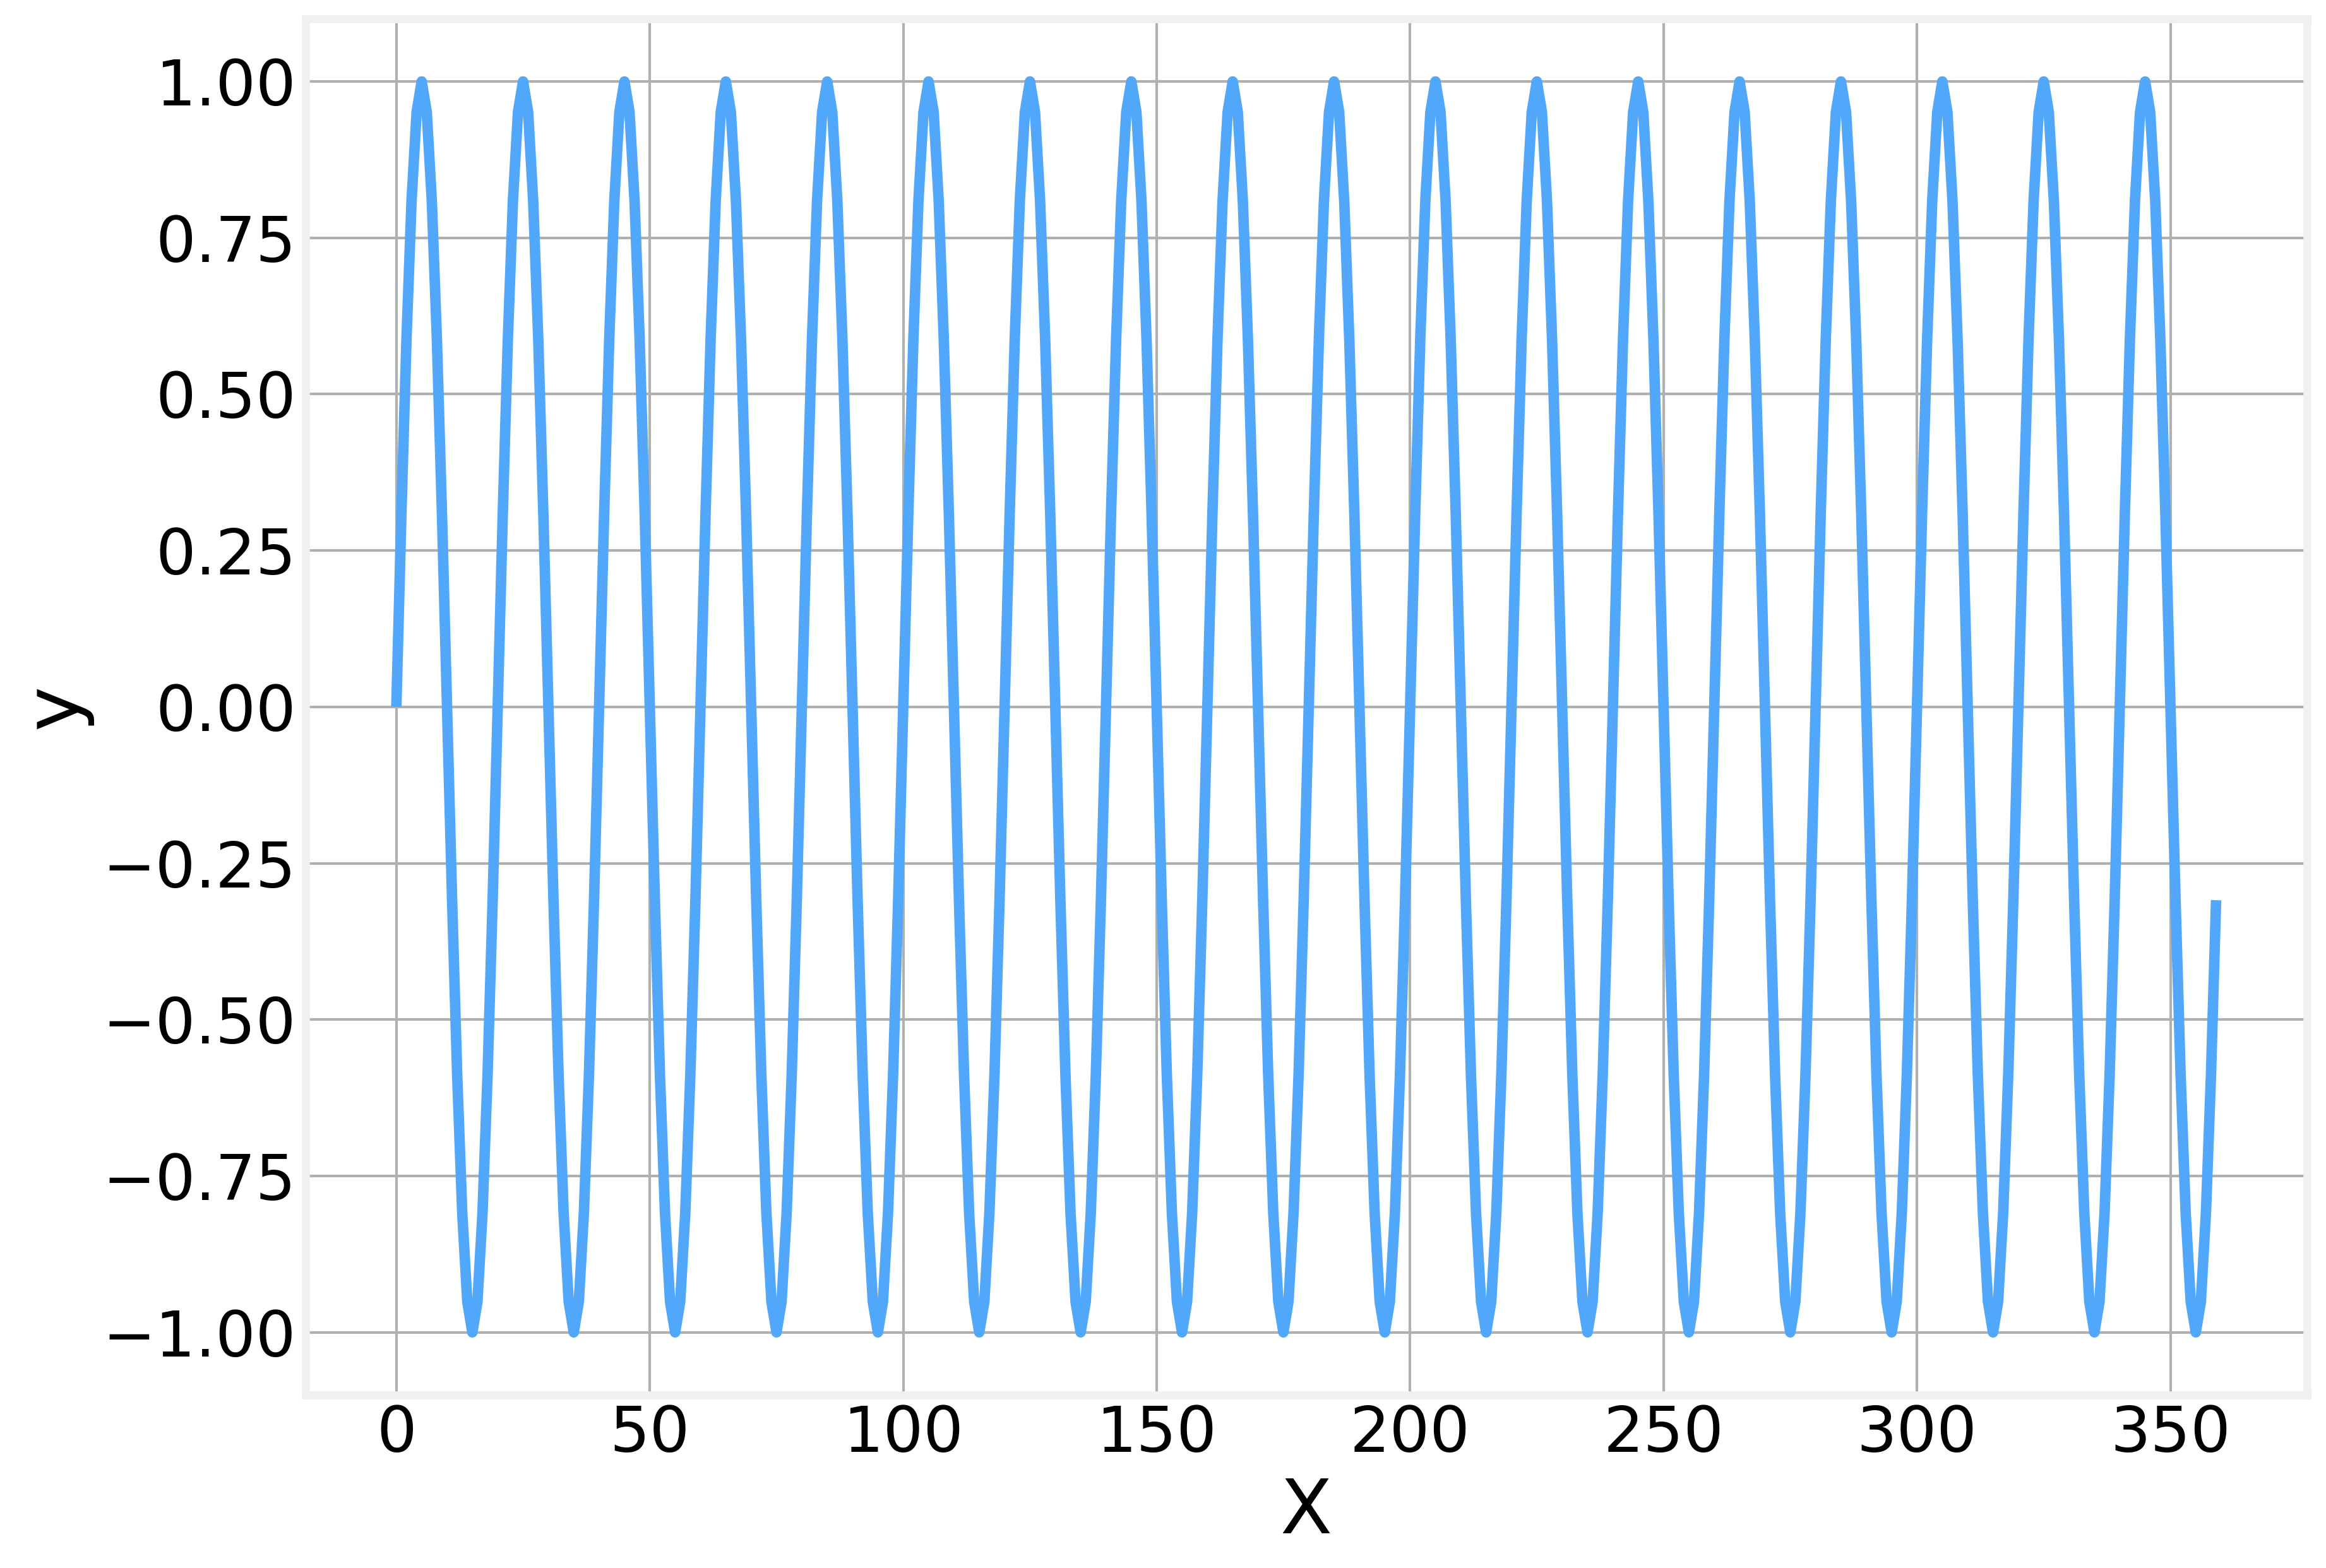

In [10]:
plt.plot(dataset)
plt.xlabel('X')
plt.ylabel('y');

## Training and Testing datasets 

The y values are just the next x value

In [11]:
values = dataset['y'].values.reshape(-1, 1)
X = values[:-1]
y = values[1:]

We'll be using the first 2/3 of the timeseries to train the model and the last 1/3 to evaluate it.

In [12]:
n_points = len(values)
train_points = int(2/3*n_points)+1
X_train, X_test = X[:train_points], X[train_points:]
y_train, y_test = y[:train_points], y[train_points:]
print("We have", len(X_train), "training points and", X_test.shape[0], "testing points")

We have 241 training points and 118 testing points


The SimpleRNN model expects a 3D ([samples, time steps, features]) dataset so we reshape them accordingly 

In [14]:
#tf.reset_default_graph()
keras.backend.clear_session()

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
print(X_train.shape)
print(X_test.shape)

(241, 1, 1)
(118, 1, 1)


We're only using one timestep

## Define the model architecture. 
We'll be using a SimpleRNN model with 4 hidden units. The Dense layer at the end has a linear activation function to aggregate the outputs of all the hidden units.

In [15]:
model = Sequential()
model.add(SimpleRNN(units=10, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 10)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


## Train the model

In [16]:
nb_epoch = 100

model.fit(X_train, y_train, epochs=nb_epoch)

Epoch 1/100
241/241 [==============================] - 0s 1ms/step - loss: 0.0535
Epoch 2/100
241/241 [==============================] - 0s 57us/step - loss: 0.0496
Epoch 3/100
241/241 [==============================] - 0s 63us/step - loss: 0.0484
Epoch 4/100
241/241 [==============================] - 0s 63us/step - loss: 0.0483
Epoch 5/100
241/241 [==============================] - 0s 66us/step - loss: 0.0485
Epoch 6/100
241/241 [==============================] - 0s 65us/step - loss: 0.0484
Epoch 7/100
241/241 [==============================] - 0s 54us/step - loss: 0.0484
Epoch 8/100
241/241 [==============================] - 0s 60us/step - loss: 0.0482
Epoch 9/100
241/241 [==============================] - 0s 68us/step - loss: 0.0483
Epoch 10/100
241/241 [==============================] - 0s 62us/step - loss: 0.0483
Epoch 11/100
241/241 [==============================] - 0s 65us/step - loss: 0.0482
Epoch 12/100
241/241 [==============================] - 0s 69us/step - loss: 0.0483
Ep

## Make predictions

In [17]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

Compile the values

In [18]:
dataset['RNN_train_predict'] = 0
dataset['RNN_test_predict'] = 0
dataset.loc[1:train_points, 'RNN_train_predict'] = y_train_pred
dataset.loc[train_points+1:, 'RNN_test_predict'] = y_test_pred

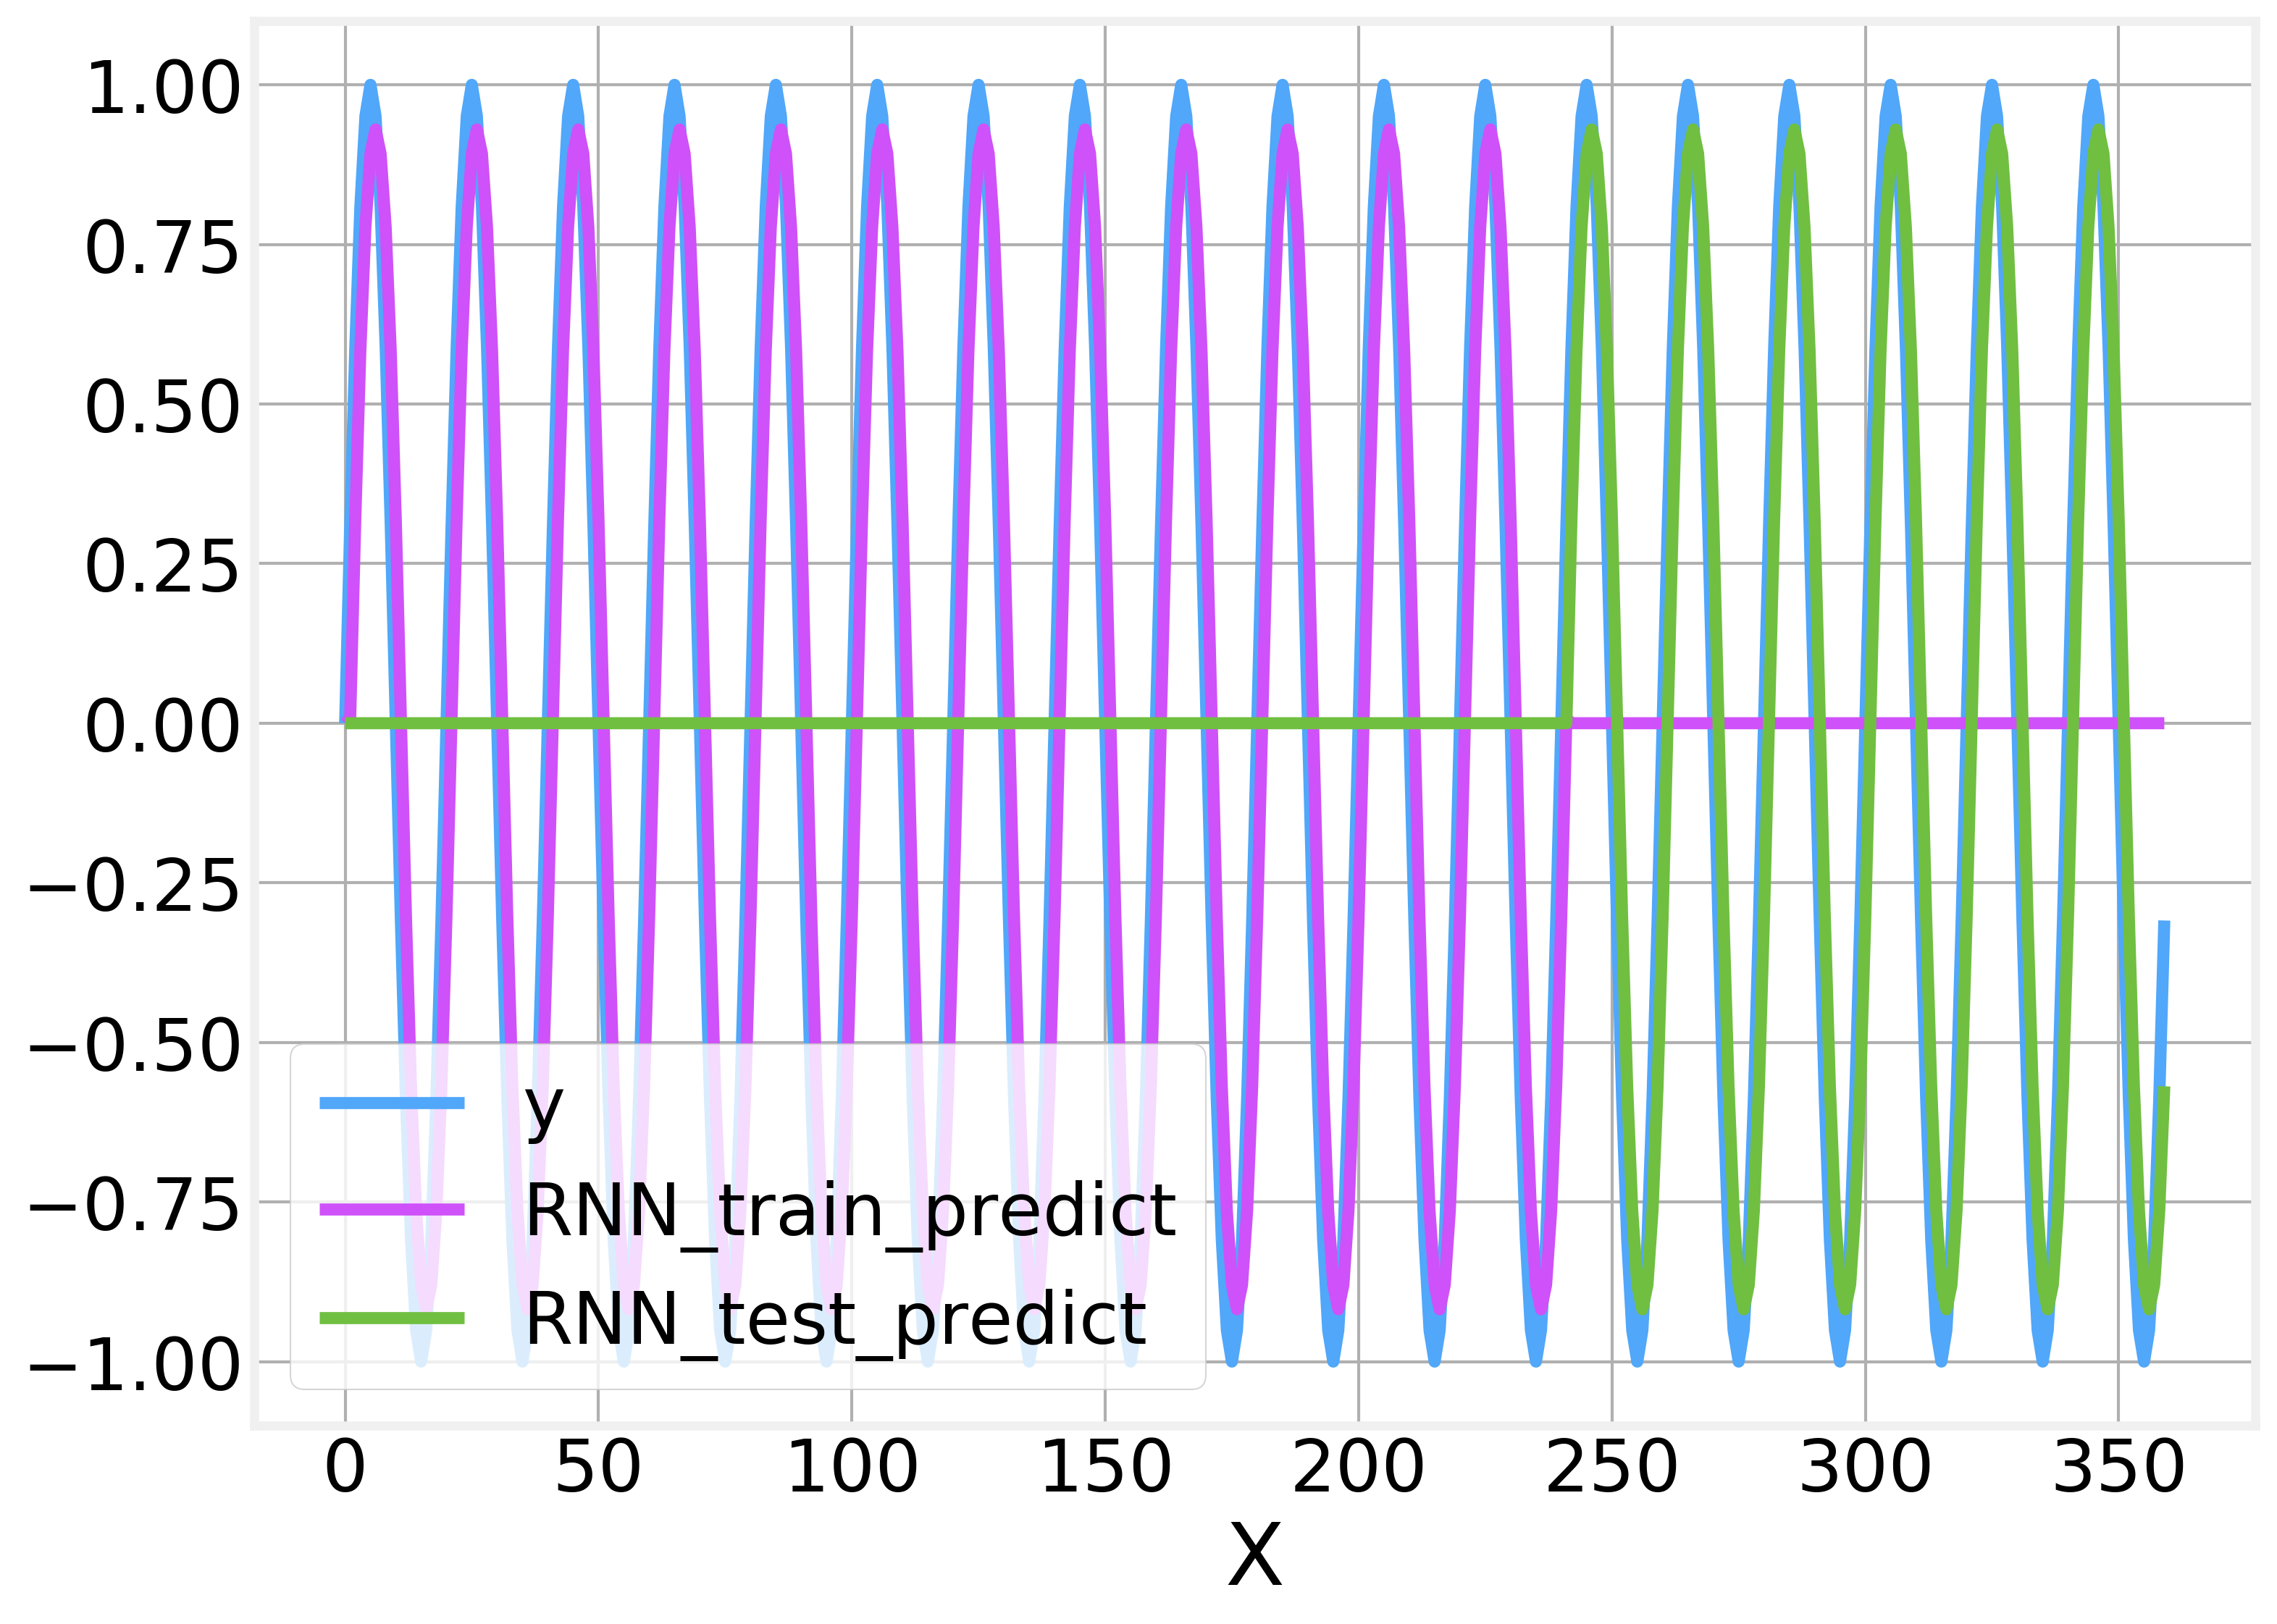

In [19]:
dataset[['y', 'RNN_train_predict', 'RNN_test_predict']].plot()
plt.gcf().set_size_inches(11, 8)

# LSTM
Let's now try using a slightly more sophisticated architecture

In [20]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 4)                 96        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [22]:
nb_epoch = 500

model.fit(X_train, y_train, epochs=nb_epoch)

Epoch 1/500
241/241 [==============================] - 0s 2ms/step - loss: 0.4593
Epoch 2/500
241/241 [==============================] - 0s 73us/step - loss: 0.4559
Epoch 3/500
241/241 [==============================] - 0s 82us/step - loss: 0.4525
Epoch 4/500
241/241 [==============================] - 0s 66us/step - loss: 0.4488
Epoch 5/500
241/241 [==============================] - 0s 83us/step - loss: 0.4449
Epoch 6/500
241/241 [==============================] - 0s 76us/step - loss: 0.4408
Epoch 7/500
241/241 [==============================] - 0s 68us/step - loss: 0.4365
Epoch 8/500
241/241 [==============================] - 0s 72us/step - loss: 0.4317
Epoch 9/500
241/241 [==============================] - 0s 74us/step - loss: 0.4269
Epoch 10/500
241/241 [==============================] - 0s 81us/step - loss: 0.4217
Epoch 11/500
241/241 [==============================] - 0s 76us/step - loss: 0.4162
Epoch 12/500
241/241 [==============================] - 0s 79us/step - loss: 0.4104
Ep

241/241 [==============================] - 0s 77us/step - loss: 0.0493
Epoch 195/500
241/241 [==============================] - 0s 55us/step - loss: 0.0493
Epoch 196/500
241/241 [==============================] - 0s 57us/step - loss: 0.0493
Epoch 197/500
241/241 [==============================] - 0s 69us/step - loss: 0.0493
Epoch 198/500
241/241 [==============================] - 0s 54us/step - loss: 0.0493
Epoch 199/500
241/241 [==============================] - 0s 65us/step - loss: 0.0493
Epoch 200/500
241/241 [==============================] - 0s 69us/step - loss: 0.0493
Epoch 201/500
241/241 [==============================] - 0s 78us/step - loss: 0.0493
Epoch 202/500
241/241 [==============================] - 0s 57us/step - loss: 0.0493
Epoch 203/500
241/241 [==============================] - 0s 70us/step - loss: 0.0493
Epoch 204/500
241/241 [==============================] - 0s 59us/step - loss: 0.0493
Epoch 205/500
241/241 [==============================] - 0s 55us/step - loss: 0

241/241 [==============================] - 0s 69us/step - loss: 0.0490
Epoch 387/500
241/241 [==============================] - 0s 55us/step - loss: 0.0490
Epoch 388/500
241/241 [==============================] - 0s 56us/step - loss: 0.0489
Epoch 389/500
241/241 [==============================] - 0s 63us/step - loss: 0.0490
Epoch 390/500
241/241 [==============================] - 0s 57us/step - loss: 0.0490
Epoch 391/500
241/241 [==============================] - 0s 59us/step - loss: 0.0490
Epoch 392/500
241/241 [==============================] - 0s 60us/step - loss: 0.0490
Epoch 393/500
241/241 [==============================] - 0s 62us/step - loss: 0.0489
Epoch 394/500
241/241 [==============================] - 0s 53us/step - loss: 0.0490
Epoch 395/500
241/241 [==============================] - 0s 55us/step - loss: 0.0490
Epoch 396/500
241/241 [==============================] - 0s 68us/step - loss: 0.0489
Epoch 397/500
241/241 [==============================] - 0s 50us/step - loss: 0

Calculate the predicted values

In [24]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

dataset['LSTM_train_predict'] = 0
dataset['LSTM_test_predict'] = 0
dataset.loc[1:train_points, 'LSTM_train_predict'] = y_train_pred
dataset.loc[train_points+1:, 'LSTM_test_predict'] = y_test_pred

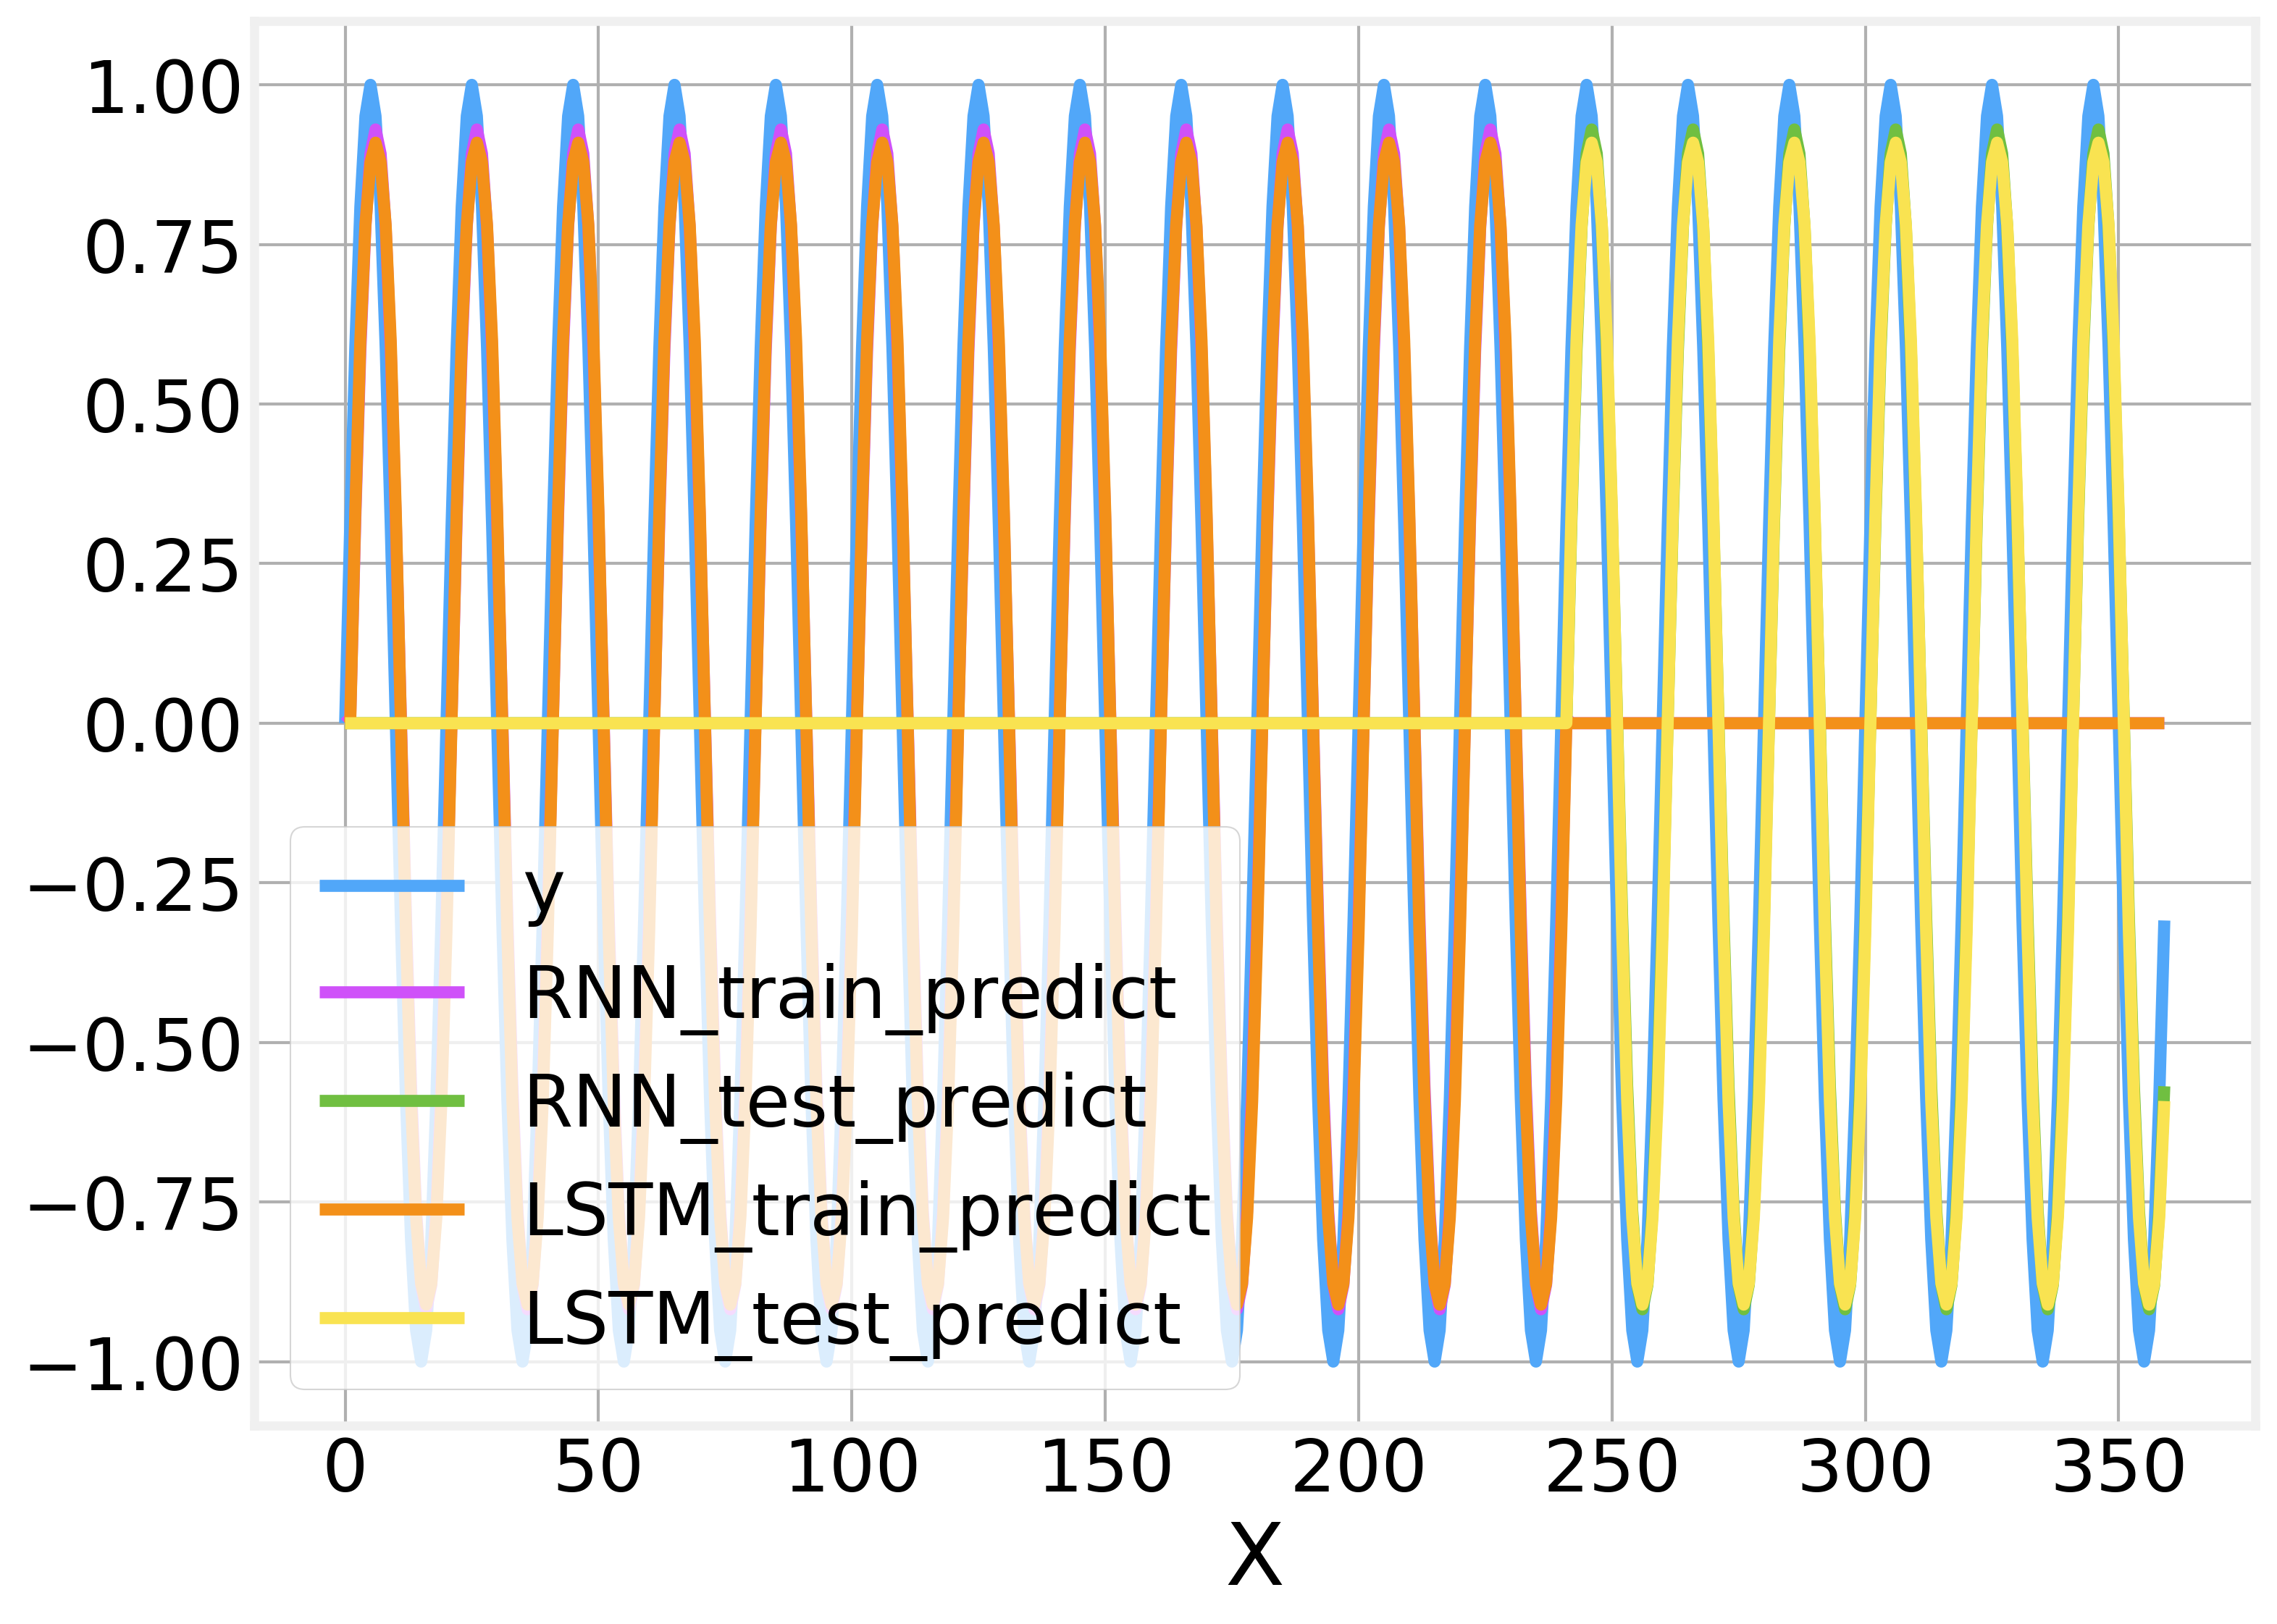

In [25]:
dataset[['y', 'RNN_train_predict', 'RNN_test_predict', 'LSTM_train_predict', 'LSTM_test_predict']].plot()
plt.gcf().set_size_inches(11, 8)

## Multiple timesteps
So far we've been using architectures with just a single timestep. Now we'll see how we can use multiple timesteps (t-1, t) to predict the value at t+1. We'll keep the basic architecture of the system. We still have the raw data in memory, so we don't need to reload it. We just have to be careful when we build the inputs

In [26]:
X2 = np.concatenate([X[0:-3], X[1:-2], X[2:-1]], axis=1)
y2 = X[3:]

X2_train, X2_test = X2[:train_points], X2[train_points:]
y2_train, y2_test = y2[:train_points], y2[train_points:]

print("We have", X2_train.shape[0], "training points and", X2_test.shape[0], "testing points")

We have 241 training points and 115 testing points


The more we increas the lag, the more points we lose! The rest of the code looks pretty much the same

In [27]:
keras.backend.clear_session()

X2_train = X2_train.reshape(X2_train.shape[0], X2_train.shape[1], 1)
X2_test = X2_test.reshape(X2_test.shape[0], X2_test.shape[1], 1)
print(X2_train.shape)
print(X2_test.shape)

(241, 3, 1)
(115, 3, 1)


But now we see that the result is slightly different. For each of our examples, we now have 3 timesteps to consider. Now we just need to refine the model:

In [28]:
model = Sequential()
model.add(LSTM(units=10, input_shape=(X2_train.shape[1], X2_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 10)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [29]:
nb_epoch = 500
model.fit(X2_train, y2_train, epochs=nb_epoch, shuffle=False)

Epoch 1/500
241/241 [==============================] - 0s 2ms/step - loss: 0.3594
Epoch 2/500
241/241 [==============================] - 0s 108us/step - loss: 0.3392
Epoch 3/500
241/241 [==============================] - 0s 111us/step - loss: 0.3194
Epoch 4/500
241/241 [==============================] - 0s 99us/step - loss: 0.3006
Epoch 5/500
241/241 [==============================] - 0s 115us/step - loss: 0.2829
Epoch 6/500
241/241 [==============================] - 0s 103us/step - loss: 0.2663
Epoch 7/500
241/241 [==============================] - 0s 105us/step - loss: 0.2509
Epoch 8/500
241/241 [==============================] - 0s 114us/step - loss: 0.2369
Epoch 9/500
241/241 [==============================] - 0s 112us/step - loss: 0.2242
Epoch 10/500
241/241 [==============================] - 0s 112us/step - loss: 0.2130
Epoch 11/500
241/241 [==============================] - 0s 109us/step - loss: 0.2034
Epoch 12/500
241/241 [==============================] - 0s 97us/step - loss: 

Epoch 98/500
241/241 [==============================] - 0s 82us/step - loss: 8.4904e-04
Epoch 99/500
241/241 [==============================] - 0s 85us/step - loss: 8.3611e-04
Epoch 100/500
241/241 [==============================] - 0s 86us/step - loss: 8.2341e-04
Epoch 101/500
241/241 [==============================] - 0s 90us/step - loss: 8.1094e-04
Epoch 102/500
241/241 [==============================] - 0s 88us/step - loss: 7.9869e-04
Epoch 103/500
241/241 [==============================] - 0s 95us/step - loss: 7.8663e-04
Epoch 104/500
241/241 [==============================] - 0s 94us/step - loss: 7.7476e-04
Epoch 105/500
241/241 [==============================] - 0s 92us/step - loss: 7.6307e-04
Epoch 106/500
241/241 [==============================] - 0s 93us/step - loss: 7.5156e-04
Epoch 107/500
241/241 [==============================] - 0s 89us/step - loss: 7.4022e-04
Epoch 108/500
241/241 [==============================] - 0s 92us/step - loss: 7.2904e-04
Epoch 109/500
241/241 [

241/241 [==============================] - 0s 70us/step - loss: 1.7415e-04
Epoch 191/500
241/241 [==============================] - 0s 70us/step - loss: 1.7066e-04
Epoch 192/500
241/241 [==============================] - 0s 79us/step - loss: 1.6722e-04
Epoch 193/500
241/241 [==============================] - 0s 80us/step - loss: 1.6385e-04
Epoch 194/500
241/241 [==============================] - 0s 83us/step - loss: 1.6053e-04
Epoch 195/500
241/241 [==============================] - 0s 79us/step - loss: 1.5727e-04
Epoch 196/500
241/241 [==============================] - 0s 76us/step - loss: 1.5406e-04
Epoch 197/500
241/241 [==============================] - 0s 74us/step - loss: 1.5091e-04
Epoch 198/500
241/241 [==============================] - 0s 71us/step - loss: 1.4781e-04
Epoch 199/500
241/241 [==============================] - 0s 77us/step - loss: 1.4477e-04
Epoch 200/500
241/241 [==============================] - 0s 81us/step - loss: 1.4178e-04
Epoch 201/500
241/241 [============

241/241 [==============================] - 0s 93us/step - loss: 2.5643e-06
Epoch 375/500
241/241 [==============================] - 0s 92us/step - loss: 2.5171e-06
Epoch 376/500
241/241 [==============================] - 0s 89us/step - loss: 2.4711e-06
Epoch 377/500
241/241 [==============================] - 0s 90us/step - loss: 2.4264e-06
Epoch 378/500
241/241 [==============================] - 0s 94us/step - loss: 2.3830e-06
Epoch 379/500
241/241 [==============================] - 0s 86us/step - loss: 2.3408e-06
Epoch 380/500
241/241 [==============================] - 0s 86us/step - loss: 2.2997e-06
Epoch 381/500
241/241 [==============================] - 0s 94us/step - loss: 2.2597e-06
Epoch 382/500
241/241 [==============================] - 0s 93us/step - loss: 2.2209e-06
Epoch 383/500
241/241 [==============================] - 0s 96us/step - loss: 2.1830e-06
Epoch 384/500
241/241 [==============================] - 0s 89us/step - loss: 2.1463e-06
Epoch 385/500
241/241 [============

In [30]:
y_train_pred = model.predict(X2_train)
y_test_pred = model.predict(X2_test)

dataset['LSTM3_train_predict'] = 0
dataset['LSTM3_test_predict'] = 0
dataset.loc[3:train_points+2, 'LSTM3_train_predict'] = y_train_pred
dataset.loc[train_points+4:, 'LSTM3_test_predict'] = y_test_pred

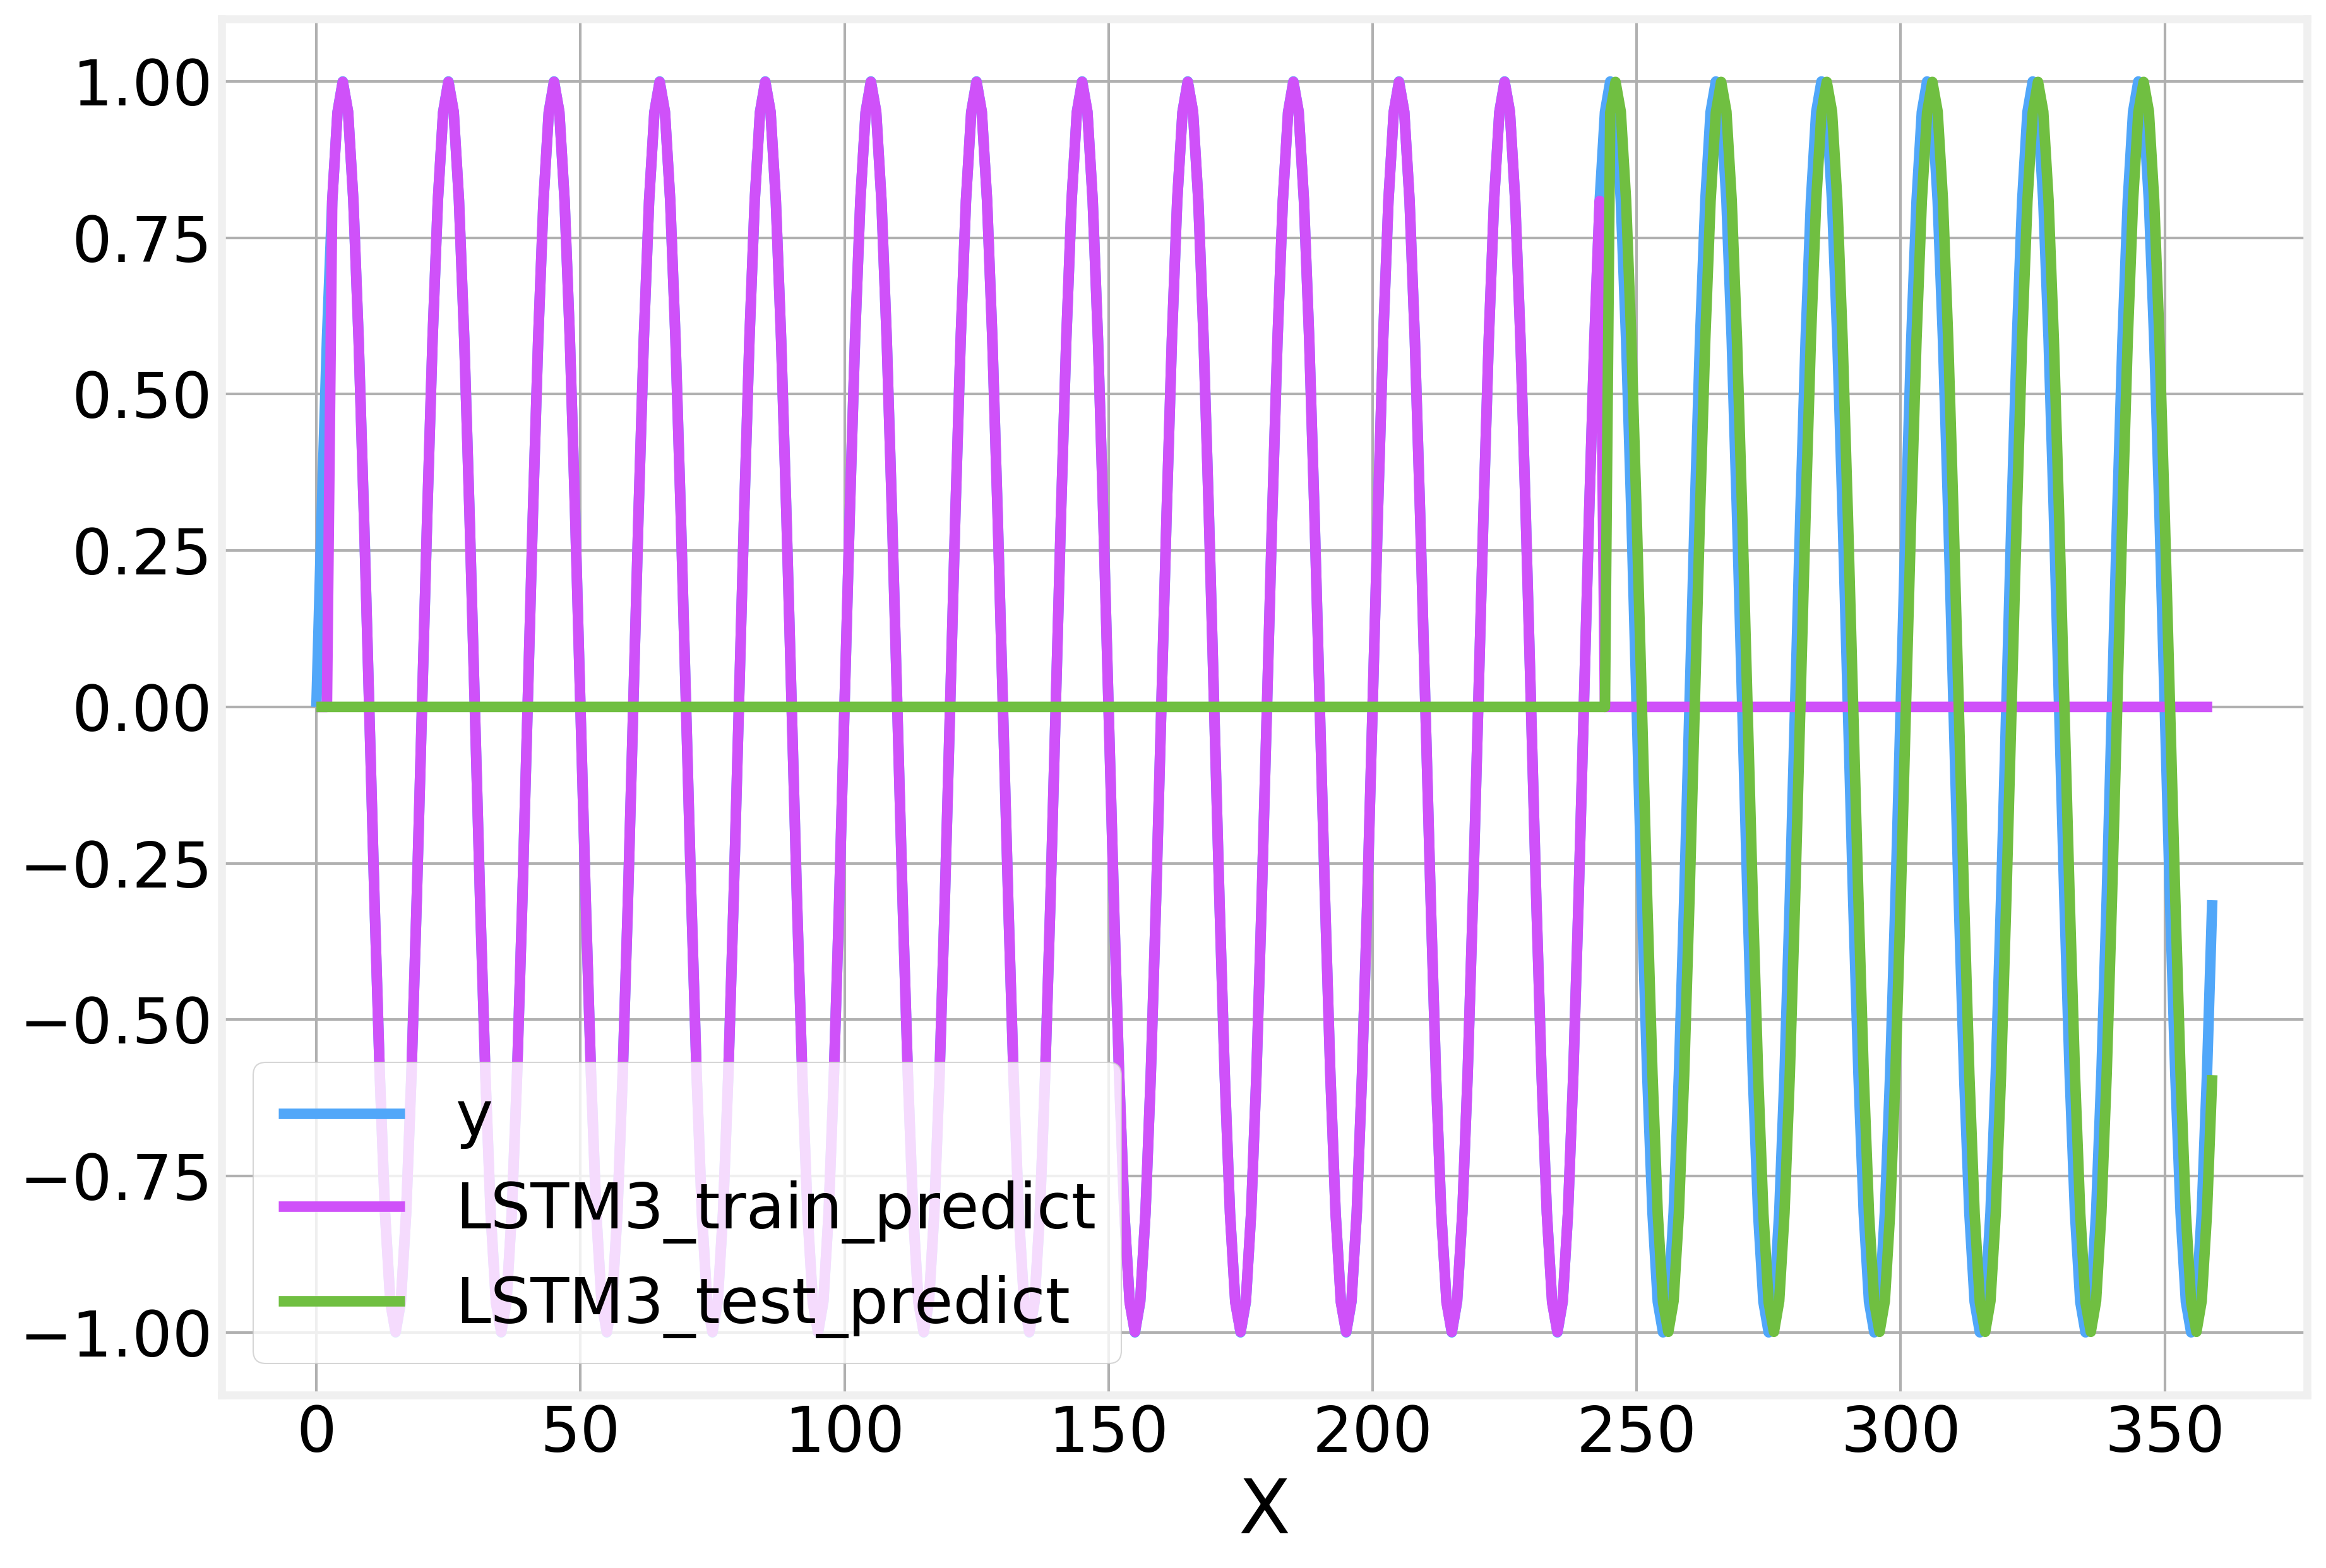

In [32]:
dataset[['y', #'RNN_train_predict', 'RNN_test_predict', 
                #'LSTM_train_predict', 'LSTM_test_predict', 
                'LSTM3_train_predict', 'LSTM3_test_predict']].plot()

<div style="width: 100%; overflow: hidden;">
     <img src="data/D4Sci_logo_full.png" alt="Data For Science, Inc" align="center" border="0" width=300px> 
</div>